# MATH0487-2 : Eléments de statistiques
## Devoir 1 - Exploration, statistiques descriptives et modèles
### L'équipe de MATH0487
#### Université de Liège, Octobre 2022

---

<!-- BEGIN QUESTION -->

**Nom(s), Prénom(s) et matricule(s) :**

<span style="color:red">GERARD Manon S201354 ; DANTINNE Charline S201485</span>

<!-- END QUESTION -->

---

## Instructions générales

### Objectifs

Les objectifs de ce devoir sont les suivants : 

- explorer un set de données et en extraire différentes statistiques descriptives,

- manipuler les paramètres d’un modèle statistique et comprendre le concept de vraisemblance (*likelihood*, en anglais).

### Délivrables

Ce devoir doit être réalisé par groupe de 2 étudiants maximum. Chaque groupe doit
rendre ce notebook complété, et rien d'autre. 

La date limite de soumission est fixée au **9 novembre 2022 à 20h00**. Jusqu’à cette date, vous avez la possibilité de (re)soumettre votre rapport ou votre code autant de fois que vous le souhaitez. Au-delà de cette date, il ne sera plus possible de soumettre le devoir. N’attendez pas la dernière minute pour soumettre une première version de votre travail !

La soumission doit se faire sur la plateforme [Gradescope](https://www.gradescope.com/) directement. 

- Chaque étudiant doit s'inscrire sur [Gradescope](https://www.gradescope.com/) en utilisant son adresse `@student.uliege.be`. Si vous ne voyez pas le cours MATH0487 dans votre tableau de bord, contactez-nous sur [Ed](https://edstem.org/us/dashboard) au plus vite (n'attendez pas la veille de la date de soumission pour vérifier que vous avez accès au cours sur Gradescope ;- ).

- Chaque groupe doit soumettre un seul fichier `.ipynb` sur [Gradescope](https://www.gradescope.com/). Toutes les cellules doivent être exécutables et leurs sorties ne doivent pas être effacées avant la soumission. Assurez-vous que tous les membres du groupe sont correctement ajoutés à la soumission !

Si vous n'êtes pas familier avec Gradescope, vous trouverez des explicationns sur chaque étape de la soumission ci-dessous :
- [Soumission de code](https://help.gradescope.com/article/ccbpppziu9-student-submit-work#code_submissions),
- [Ajout de membres de groupe](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

***Remarques importantes*** sur l'utilisation de ce notebook :
- Ne modifiez et ne supprimez pas de cellules (Markdown) contenant des consignes/questions.
- Remplissez uniquement les cellules prévues à cet effet (`...` indique une portion réservée à votre code, et <span style="color:red">$\texttt{VOTRE TEXTE ICI}$</span> indique une portion réservée à une réponse écrite), n'en créez pas de nouvelles; si, pour une raison quelconque, vous veniez à supprimer une cellule prédéfinie, il vous est demandé de télécharger à nouveau le notebook vierge et de copier le contenu déjà développé de votre côté dans cette copie vierge.
- Respectez le type de cellule prévu pour une question donnée: certaines questions demandent d'implémenter du code (cellules "Code", en Python) et de présenter des résultats (valeurs numériques, tables, graphes, ...), et d'autres vous demandent de fournir une réponse utilisant du texte (cellules "Markdown", incluant certaines commandes LaTeX et acceptant la syntaxe HTML).

Si vous rencontrez des problèmes ou avez des questions concernant ces remarques, merci de contacter l'équipe pédagogique *via* le forum de [Ed Discussion](https://edstem.org/us/courses/29547/discussion/1795956).

### Questions

Toutes vos questions sur le devoir doivent être postées dans le forum de [Ed Discussion](https://edstem.org/us/courses/29547/discussion/1795956) du
cours sous la catégorie *Assignments/Homework* (une question par fil de discussion). Vos questions sur
l’utilisation de Jupyter peuvent être postées sous la catégorie *Jupyter*.

### Politique de collaboration

Vous pouvez discuter du devoir avec d’autres groupes, mais *vous devez
écrire vous-même vos propres solutions, et écrire et exécuter vous-même votre propre code*. Copier la
solution de quelqu’un d’autre, ou simplement apporter des modifications triviales pour ne pas copier
textuellement, n’est pas acceptable.

---

## 0. Présentation du problème

Le set de données que vous allez étudier reprend certaines caractéristiques physicochimiques et sensorielles de différentes variantes du vin portugais *Vinho verde*. Protégé par une *Denominação de Origem Controlada*, ce vin est originaire de la région de Minho, au nord-ouest du Portugal, et sa zone de production représente environ 15 % de la superficie du vignoble de ce pays. Le nom de ce vin fait référence à sa vivacité, dûe à sa vendange précoce, et non à sa couleur ; en effet, il existe aussi bien des vinho verde blancs que rouges et rosés.

En particulier, dans ce premier devoir, vous allez vous concentrer sur des variantes rouges de ce vin. Les données que vous allez étudier pourraient être utilisées afin de construire un modèle prédictif de la qualité d'un vin en fonction de ses propriétés physicochimiques, par exemple. Ces données peuvent être chargées depuis le fichier `math0487_fa22_hw1_data.csv` de l'archive fournie et présentent, pour chacun des 1599 variantes répertoriées, plusieurs variables comme
- l'acidité fixe (différence entre l'acidité totale et l'acidité volatile, acides organiques et minéraux) [g/dm^3], 
- le sucre résiduel (sucre restant dans le vin après la fermentation alcoolique) [g/dm^3], 
- la quantité de cholrides dans le vin [g/dm^3], ou encore 
- la qualité du vin [-, score entre 0 et 10]. 

Seule une partie de ces données va être étudiée dans le cadre de ce devoir.

Dans la suite, vous allez mettre en pratique les concepts théoriques de statistique descriptive et de modèle statistique afin d'explorer le set de données présenté ci-avant. 

## 1. Analyse descriptive

Dans cette première partie du devoir, nous considérons que le set de données qui vous est fourni constitue une *population* entière. Vous allez d'abord extraire certaines valeurs de ce set de données, puis vous calculerez au sein de cette population la moyenne, l'écart-type, la médiane et certains quartiles pour les variables suivantes : 
- l'acidité fixe ('fixed acidity', [g/dm^3]), 
- le pH ('pH', [-]), et 
- la quantité d'alccol ('alcohol', [vol%]).

**Remarques.** En pratique, lors d'une étude statistique, vous n'avez jamais accès à la population entière. Vous devez donc *estimer* la moyenne, l'écart-type, etc. avec des *estimateurs*, évalués à l'aide d'*échantillons*. Ces concepts d'échantillon et d'estimateur seront abordés dans la seconde partie de ce devoir ; les valeurs calculées dans cette première partie (évaluées sur la *population*) permettront ainsi de mesurer les performances de ces estimateurs (évalués à l'aide d'*échantillons* de la population).  

### Question 1.1. 
Pour vous donner une idée des ordres de grandeur de chaque variable étudiée, vous allez d'abord extraire les valeurs de ces variables pour 3 vins de votre population : le 10ème, le 20ème, et le 30ème. Une fois ces valeurs extraites, stockez-les dans une [dataframe Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). Utilisez pour ce faire la dataframe définie ci-dessous (`df_q1_1`). 

In [18]:
# ces librairies devraient suffir à réaliser ce premier devoir, vous pouvez évidemment en utiliser d'autres (à importer dans cette cellule).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.gridspec as gridspec

In [19]:
# initialisation de la dataframe (à remplir)
idx = ['10th', '20th', '30th']
var = ['fixed acidity', 'pH', 'alcohol']

# chargement du dataset
sheet_url = "./data/math0487_fa22_hw1_data.csv"
data = pd.read_csv(sheet_url, header=0, names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'], usecols=['fixed acidity','pH','alcohol'])

# calcul des valeurs demandées
array = np.zeros((3,3))
j = 0
for i in np.arange(10-1, 40-1, 10):
    array[j][0] = data['fixed acidity'][i]
    array[j][1] = data['pH'][i]
    array[j][2] = data['alcohol'][i]
    j += 1

df_q1_1 = pd.DataFrame(array, idx, var)

# visualisation de la dataframe
df_q1_1

,fixed acidity,pH,alcohol
10th,7.5,3.35,10.5
20th,7.9,3.04,9.2
30th,7.8,3.38,9.8


<!-- BEGIN QUESTION -->

### Question 1.2. 
Vous allez maintenant analyser plus en détails la distribution de ces variables. *Pour chacune d'entre elles*, vous allez calculer différentes valeurs: la moyenne, l'écart-type, la médiane et les quartiles ($F^{-1}(0.25)$,  $F^{-1}(0.5)$ et $F^{-1}(0.75)$). A nouveau, il vous est demandé de remplir la dataframe prévue à cet effet (`df_q1_2`).

In [20]:
# initialisation de la dataframe (à remplir)
var = ['fixed acidity', 'pH', 'alcohol']
idx = ['mean', 'std', 'median', 'q25', 'q75']
q25 = np.zeros(3)
q75 = np.zeros(3)

data_fxd_acid_pH_alcohol = data[['fixed acidity', 'pH','alcohol']]

# calcul des valeurs demandées
mean = data.mean(numeric_only=True)
std = data.std(numeric_only=True)
median = data.median(numeric_only=True)
fxd_acid = data_fxd_acid_pH_alcohol['fixed acidity']
q25[0] = np.sort(fxd_acid)[int(np.ceil(len(fxd_acid)*0.25))-1]
q75[0] = np.sort(fxd_acid)[int(np.ceil(len(fxd_acid)*0.75))-1]
pH = data_fxd_acid_pH_alcohol['pH']
q25[1] = np.sort(pH)[int(np.ceil(len(pH)*0.25))-1]
q75[1] = np.sort(pH)[int(np.ceil(len(pH)*0.75))-1]
alcohol = data_fxd_acid_pH_alcohol['alcohol']
q25[2] = np.sort(alcohol)[int(np.ceil(len(alcohol)*0.25))-1]
q75[2] = np.sort(alcohol)[int(np.ceil(len(alcohol)*0.75))-1]

array2 = np.zeros((5,3))
for i in np.arange(0, 3, 1):
    array2[0][i] = mean[i]
    array2[1][i] = std[i]
    array2[2][i] = median[i]
    array2[3][i] = q25[i]
    array2[4][i] = q75[i]

df_q1_2 = pd.DataFrame(array2, idx, var)

# visualisation de la dataframe
df_q1_2

,fixed acidity,pH,alcohol
mean,8.319637,3.311113,10.422983
std,1.741096,0.154386,1.065668
median,7.900000,3.310000,10.200000
q25,7.100000,3.210000,9.500000
q75,9.200000,3.400000,11.100000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Y a-t-il des données aberrantes ? Tracez un graphique *par variable* illustrant ces valeurs (3 figures sont donc attendues) puis répondez à cette question. 

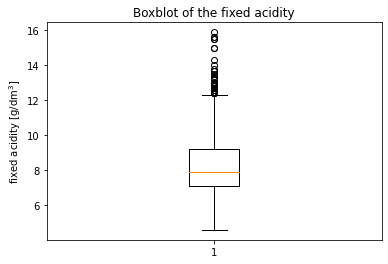

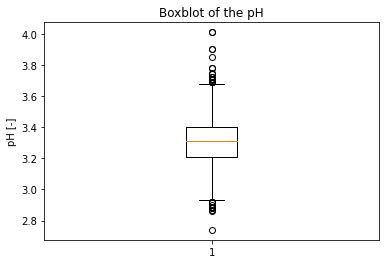

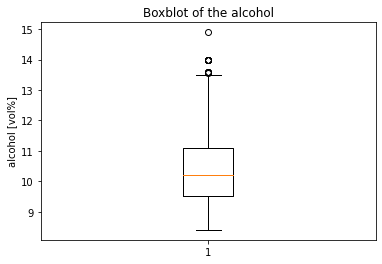

In [21]:
fig = plt.figure()
plt.boxplot(fxd_acid)
plt.ylabel('fixed acidity [g/dm$^3$]')
plt.title('Boxblot of the fixed acidity')
plt.show()

fig = plt.figure()
plt.boxplot(pH)
plt.ylabel('pH [-]')
plt.title('Boxblot of the pH')
plt.show()

fig = plt.figure()
plt.boxplot(alcohol)
plt.ylabel('alcohol [vol%]')
plt.title('Boxblot of the alcohol')
plt.show()

<span style="color:red"> Oui, il y a des données aberrantes qu'on peut voir grâce aux tracers de boxplot de notre échantillon. Ces données aberrantes sont représentées par les petits ronds.</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Comment appelle-t-on ce genre de graphique ? 

<span style="color:red">Il s'agit d'une boite à moustache (en anglais $\textit{boxplot}$)</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

A partir de ces graphiques et sans considérer les données aberrantes, que pouvez-vous déduire quand à la moyenne de chacune des variables ?

<span style="color:red">Les boites à moustaches ne nous apprennent rien sur la moyenne.</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Que pouvez-vous dire en comparant ces graphiques ?

<span style="color:red">Nous pouvons voir que l'acidité fixe et l'alcool ont des données aberrantes de valeurs supérieures (plus pour l'acidité que pour l'acool)  tandis que le pH en a à la fois en valeurs supérieures et inférieures. Pour le pH on peut se dire que les valeurs seront à la fois faussées à la hausse et à la baisse, donc cela se compenserait plus ou moins. Alors que pour l'acidité et l'alcool, les valeurs ne seront faussées qu'à la hausse et donc on sait déjà que nos résultats ne sont pas exacts. </span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Tracez maintenant l'histogramme et la fonction de répartition (*cumulative distribution function* (CDF), en anglais) pour chaque variable. (6 figures attendues, avec titre et/ou noms d'axes)

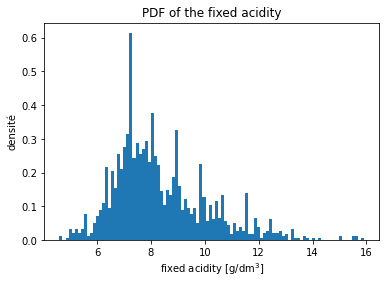

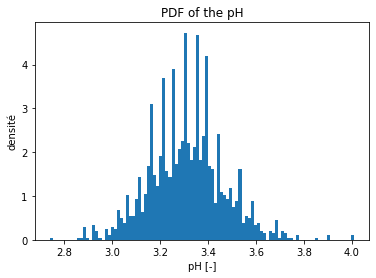

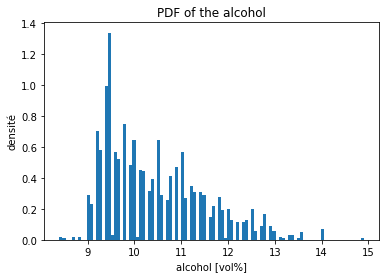

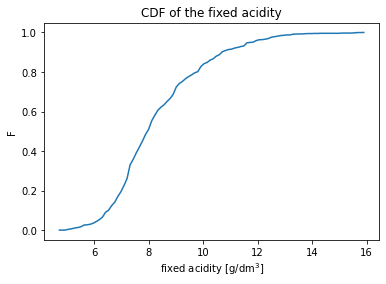

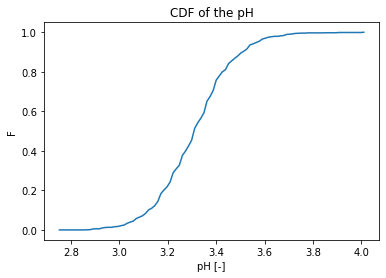

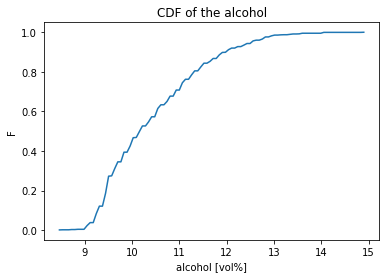

In [22]:
# génération des différentes figures
#histogrammes
fig = plt.figure()
plt.hist(fxd_acid, density=True, bins=100)
plt.xlabel('fixed acidity [g/dm$^3$]')
plt.ylabel('densité')
plt.title('PDF of the fixed acidity')
plt.show()

fig = plt.figure()
plt.hist(pH, density=True, bins=100)
plt.xlabel('pH [-]')
plt.ylabel('densité')
plt.title('PDF of the pH')
plt.show()

fig = plt.figure()
plt.hist(alcohol, density=True, bins=100)
plt.xlabel('alcohol [vol%]')
plt.ylabel('densité')
plt.title('PDF of the alcohol')
plt.show()

#CDF
fxd_acid_count, fxd_acid_bins_count = np.histogram(fxd_acid, bins=100)
fxd_acid_pdf = fxd_acid_count / sum(fxd_acid_count)
fxd_acid_cdf = np.cumsum(fxd_acid_pdf)
fig = plt.figure()
plt.plot(fxd_acid_bins_count[1:], fxd_acid_cdf)
plt.xlabel('fixed acidity [g/dm$^3$]')
plt.ylabel('F')
plt.title('CDF of the fixed acidity')
plt.show()

pH_count, pH_bins_count = np.histogram(pH, bins=100)
pH_pdf = pH_count / sum(pH_count)
pH_cdf = np.cumsum(pH_pdf)
fig = plt.figure()
plt.plot(pH_bins_count[1:], pH_cdf)
plt.xlabel('pH [-]')
plt.ylabel('F')
plt.title('CDF of the pH')
plt.show()

alcohol_count, alcohol_bins_count = np.histogram(alcohol, bins=100)
alcohol_pdf = alcohol_count / sum(alcohol_count)
alcohol_cdf = np.cumsum(alcohol_pdf)
fig = plt.figure()
plt.plot(alcohol_bins_count[1:], alcohol_cdf)
plt.xlabel('alcohol [vol%]')
plt.ylabel('F')
plt.title('CDF of the alcohol')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Comparez. En particulier : 
- Les histogrammes générés peuvent être utilisés afin d'avoir une idée de la fonction de densité (*probability density function* (PDF), en anglais) des différentes variables dans la population : les différentes distributions que vous approximez vous font-elles penser à des distributions connues ? 
- Mettez également en relation la PDF et la CDF pour chaque variable (justifiez théoriquement). 
- Mettez vos résultats en relation avec les graphes illustrant les valeurs aberrantes générés plus tôt dans le devoir, pour chaque variable.

<span style="color:red">

1.

L'acidité fixe ressemble à une distribution Normale non standardisée (décalée vers la gauche)
    
Le pH ressemble à une distribution Normale
    
L'alcool ressemble à une distribution Exponentielle
    
2.

Les caractéristiques de la PDF d'une Normale possède son pic assez rapidement car elle est décalée pour ensuite décroître. En effet, sa CDF possède un premier plateau plus court dû au décalage puis poursuit sa forme habituelle.
    
La caractéristique de la PDF d'une Normale est sa célèbre forme de cloche. En effet, sa CDF possède bien la symétrie centrale (un plateau suivit d'un pic pour revenir à un plateau)
    
La caractéristique de la PDF d'une Exponentielle est son début très élevé qui tend ensuite vers zéro. En effet, sa CDF augmente très rapidement puis stagne. 

3.

Les données abérantes de l'acidité fixe sont réparties à droite et donc nous avons bien une distribution Normale qui possède beaucoup de valeurs à gauche, les données abérantes seront donc plutôt à droite dû au décalage.
    
Les données abérantes du pH sont réparties à gauche et à droite. Nous avons donc bien une distribution Normale.
    
Les données abérantes de l'alcool sont réparties à droite et donc nous avons bien une distribution Exponentielle qui possède beaucoup de valeurs à gauche, les données abérantes seront donc plutôt à droite. Toutefois, il y a moins de valeurs abérantes que pour une distribution Normale. 

À la suite de nos calculs de la question 2.3, on peut conclure que l'hypothèse de l'Exponentielle n'est pas tout à fait correcte.</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.3.
Enfin, vous allez analyser les relations qui existent entre les différentes variables. Comparez, numériquement *et* graphiquement, les trois couples de variables.
- Pour la comparaison numérique, organisez vos valeurs dans une dataframe `rel_df` (matrice de corrélation). 
- Pour les graphiques, organisez vos nuages de points sous la forme d'une "matrice" (comme proposé dans cette [vidéo](https://www.youtube.com/watch?v=6lm4wJ1qm0w) de Jean-luc Doumont).

In [23]:
# comparaison numérique 
rel_df = data_fxd_acid_pH_alcohol.corr()

# visualisation
rel_df

,fixed acidity,pH,alcohol
fixed acidity,1.000000,-0.682978,-0.061668
pH,-0.682978,1.000000,0.205633
alcohol,-0.061668,0.205633,1.000000


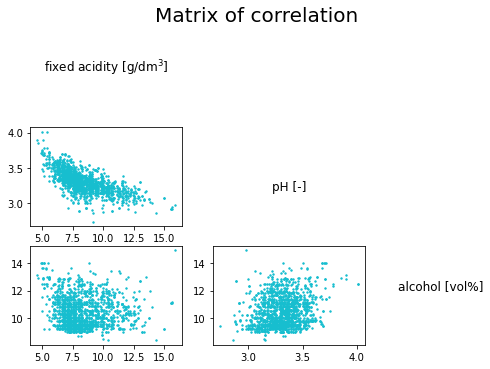

In [24]:
# comparaison graphique
# les regrouper comme dans la video
fig = plt.figure()
gs = fig.add_gridspec(2, 2)
ax = dict()
ax['A'] = fig.add_subplot(gs[0, 0])
ax['A'].scatter(fxd_acid, pH, s=2, marker='o', c = 'tab:cyan')
ax['A'].set_title('fixed acidity [g/dm$^3$]', y = 1.5)

ax['B'] = fig.add_subplot(gs[1, 0])
ax['B'].scatter(fxd_acid, alcohol, s = 2, marker = 'o', c ='tab:cyan')
ax['B'].set_title('pH [-]', y = 1.5, x = 1.7)

ax['C'] = fig.add_subplot(gs[1, 1])
ax['C'].scatter(pH, alcohol, s =2, marker = 'o', c ='tab:cyan')
ax['C'].set_title('alcohol [vol%]', y = 0.5, x = 1.5)
fig.suptitle('Matrix of correlation', y = 1.3, x = 0.65, fontsize = 20)
plt.show()

A la lumière des comparaisons numériques **et** graphiques que vous avez générées, que pouvez-vous déduire des relations entre les variables ?  

<span style="color:red">

Lorsque l'on regarde à la valeur absolue de la corrélation entre le pH et l'acidité fixe, on remarque qu'elle semble assez élévée. Le graphique confirme cette corrélation car les points sont assez fortement regroupés. De plus, la valeur de la corrélation est négative et le graphique montre lui aussi une pente négative.

L'acidité fixe et l'alcool sont les moins corrélés avec un faible taux de -0,061. Graphiquement, cela se voit aussi car les points sont tous éparpillés.

Le pH et l'alcool sont peu corrélés numériquement et on peut voir que les points sont donc assez éparpillés mais moins que précédemment.

</span>

<!-- END QUESTION -->

## 2. Echantillon, modèle et vraisemblance

Pour cette seconde partie du devoir, vous allez vous focaliser sur une seule variable de votre population: l'alcool (*alcohol* dans votre set de données), dénotée $X$. Afin d'étudier les concepts de modèle et de vraisemblance, vous allez maintenant travailler avec des échantillons et non plus la population complète. Les notions d'estimateur et de biais vont également être abordées.

<!-- BEGIN QUESTION -->

### Question 2.1.
Afin d'étudier le concept de biais et d'estimer le biais de certains estimateurs vus au cours, vous allez premièrement comparer les effets de certains paramètres sur la précision de deux estimateurs : 
- la moyenne d'échantillon $\bar{X}$, comme estimateur de la moyenne de population $\mu$, et
- la variance d'échantillon (biaisée) $\hat{\sigma}^2$, comme estimateur de la variance de population $\sigma^2$.

Pour ce faire, vous allez générer les courbes suivantes, en tirant $500$ échantillons différents :
- dans une première figure, l'évolution de la valeur absolue du biais de la moyenne d'échantillon, ainsi que l'évolution de la variance de la moyenne d'échantillon en fonction de la taille d'échantillon $n$, pour $n \in \{1, 2, \ldots, 100\}$ ;
- dans une seconde figure, idem, mais pour l'évolution de la valeur absolue du biais de la variance d'échantillon.

Au total, **deux** figures sont attendues, chacune contenant **deux** courbes. Pensez à **ajouter une légende** sur vos deux figures, afin d'éviter une confusion entre les courbes (en plus des labels d'axes, évidemment).

*Remarque importante*: lorsque vous calculez des statistiques en utilisant une fonction implémentée dans une librairie Python (ou autre), *vérifiez* dans la documentation que cette fonction calcule bien la statistique souhaitée telle que définie dans le cours théorique.

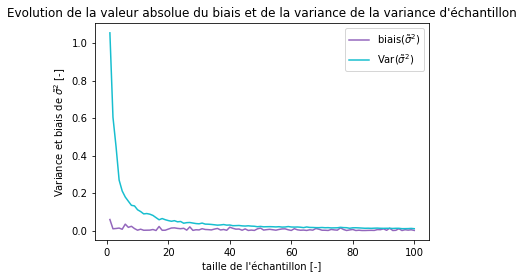

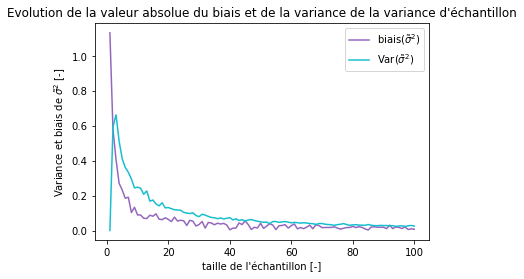

In [25]:
X = alcohol
mu = X.mean()
sigma_carre = X.var(ddof=0) #le sigma lui doit etre biaisé ou non ?

# sample size
n = 100
size = np.arange(1, n+1, 1)

# Number of repetitions
n_rep = 500

# Loop to generate samples and compute sample means and variance than obtain the biais and variance
biais_X = np.zeros(n)
var_X = np.zeros(n)
biais_sigma = np.zeros(n)
var_sigma = np.zeros(n)
X_bar = np.zeros(n_rep)
sigma_chapeau_carre = np.zeros((n, n_rep))
E_sigma_chapeau_carre = np.zeros((n, 1))

for i in size:
    for j in np.arange(n_rep):
        echantillon = X.sample(n=i)
        if i == 1:
            X_bar[j] = echantillon
            sigma_chapeau_carre[i-1][j] = 0
        else:
            X_bar[j] = echantillon.mean()
            sigma_chapeau_carre[i-1][j] = echantillon.var(ddof=0)
    biais_X[i-1] = abs(np.mean(X_bar) - mu)
    var_X[i-1] = X_bar.var(ddof=0)
    
    E_sigma_chapeau_carre[i-1] = np.mean(sigma_chapeau_carre[i-1])
    biais_sigma[i-1] = abs(E_sigma_chapeau_carre[i-1] - sigma_carre)
    var_sigma[i-1] = sigma_chapeau_carre[i-1].var(ddof=0)

fig = plt.figure()
plt.plot(size, biais_X, 'tab:purple', label=r'biais($\tilde{\sigma}^2$)')
plt.plot(size, var_X, 'tab:cyan', label=r'Var($\tilde{\sigma}^2$)')
plt.xlabel('taille de l\'échantillon [-]')
plt.ylabel(r'Variance et biais de $\tilde{\sigma}^2$ [-]')
plt.title('Evolution de la valeur absolue du biais et de la variance de la variance d\'échantillon')
plt.legend(loc='best')
plt.show()

fig = plt.figure()
plt.plot(size, biais_sigma, 'tab:purple', label=r'biais($\tilde{\sigma}^2$)')
plt.plot(size, var_sigma, 'tab:cyan', label=r'Var($\tilde{\sigma}^2$)')
plt.xlabel('taille de l\'échantillon [-]')
plt.ylabel(r'Variance et biais de $\tilde{\sigma}^2$ [-]')
plt.title('Evolution de la valeur absolue du biais et de la variance de la variance d\'échantillon')
plt.legend(loc='best')
plt.show()

Qu'observez-vous ? En particulier :

- Comparez, pour chaque estimateur, l'influence de la taille d'échantillon $n$ sur le biais de cet estimateur. 
- Comparez, pour chaque estimateur, l'influence de la taille d'échantillon $n$ sur la variance de cet estimateur. 

Justifiez vos observations.

<span style="color:red">

Variance de $\bar{X}$ : Les moyennes individuelles de chacun des 500 échantillons convergent vers notre moyenne plus $n$ est élevé. Ainsi, pour un $n$ élevé, la variance est donc presque nulle. En revanche, pour un petit $n$, les moyennes des échantillons sont disparates. À noter que, malgré ces valeurs disparates, leur moyenne générale est bien proche de la vraie valeur. 
    
Biais de $\bar{X}$ : Ainsi, la moyenne générale, peu importe la taille d'échantillon, reste plus ou moins proche de la vraie valeur. Le biais est donc presque nul. 
    
Biais de $\hat{σ}^2$ : Plus $n$ est grand, plus la moyenne de nos variances est proche de la vraie valeur. En effet, les variances extrêmes se compensent. Ainsi, le biais diminue quand $n$ augmente et tend vers 0.
    
Variance de $\hat{σ}^2$ : Nous pouvons remarquer qu'en 1 la variance est nulle, ce qui est trivial. À partir de $n = 2$, la somme des écarts entre la valeur et la moyenne augmente, mais les valeurs restant dans un certain intervalle, quand $n$ augmente, la variance générale diminue pour tendre vers 0.</span>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2.2. 
L'estimateur de la variance de la population que vous avez utilisé au point précédent est un estimateur *biaisé*. Répétez maintenant l'opération de la question précédente pour la variance de la population en modifiant votre estimateur pour qu'il soit *non-biaisé*.

Commencez par définir l'estimateur utilisé (nom et définition mathématique).

<span style="color:red">$s^2$, l'estimateur de la variance non biaisé : $s^2 = \dfrac{1}{n - 1} \displaystyle{\sum_{i = 1}^n} (x_i - \bar{x})^2$</span>

Tracez maintenant les graphes demandés.

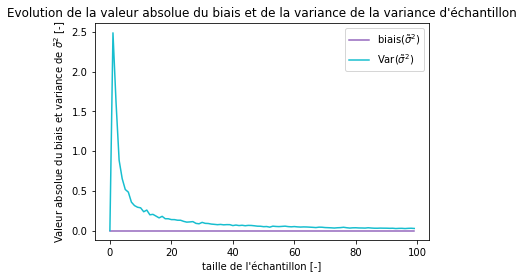

In [26]:
biais_sigma_nb = np.zeros(n)
var_sigma_nb = np.zeros(n)
sigma_non_biaise = np.zeros((n, n_rep))

for i in np.arange(1, n+1, 1):
    for j in np.arange(n_rep):
        if E_sigma_chapeau_carre[i-1] == 0:
            sigma_non_biaise[i-1][j] = sigma_carre # Afin d'éviter la division par 0 qui causait un problème
        else:
            # comme à l'exercice 3.4 c
            sigma_non_biaise[i-1][j] = (sigma_carre / E_sigma_chapeau_carre[i-1]) * sigma_chapeau_carre[i-1][j]
            
        biais_sigma_nb[i-1] = abs(np.mean(sigma_non_biaise[i-1]) - sigma_carre)
        var_sigma_nb[i-1] = sigma_non_biaise[i-1].var(ddof=0)

fig = plt.figure()
plt.plot(np.arange(n), biais_sigma_nb, 'tab:purple', label=r'biais($\tilde{\sigma}^2$)')
plt.plot(np.arange(n), var_sigma_nb, 'tab:cyan', label=r'Var($\tilde{\sigma}^2$)')
plt.xlabel('taille de l\'échantillon [-]')
plt.ylabel(r'Valeur absolue du biais et variance de $\tilde{\sigma}^2$ [-]')
plt.title('Evolution de la valeur absolue du biais et de la variance de la variance d\'échantillon')
plt.legend(loc='best')
plt.show()

<!-- END QUESTION -->

### Question 2.3.
Vous allez maintenant étudier les concepts de modèle statistique et de vraisemblance. La distribution à modéliser est celle de la variable aléatoire étudiée précédemment dans cette seconde partie du devoir (l'alcool). D'autres variables comme celles étudiées dans la première partie pourraient être modélisées également.

Considérons 2 modèles afin de modéliser la distribution de la variable étudiée :

- une distribution exponentielle de paramètre $\lambda$ dont la densité de probabilité (*probability density function* ou PDF, en anglais) est donnée par (cas 1)
$$\lambda e^{-\lambda x}, \; \text{pour} \; x>0 ;$$

- une distribution normale de paramètres $\mu$ et $\sigma^2$ (dénotant la moyenne et la variance, respectivement) dont la PDF est donnée par (cas 2)
$$\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right).$$

<!-- BEGIN QUESTION -->

Par souci de simplicité, vous allez étudier la log-vraisemblance pour les deux modèles présentés ci-avant. Pour chacun de ces modèles, donnez la formulation analytique de la fonction de log-vraisemblance *pour un échantillon $\textbf{x}=\{x_1, x_{2}\}$ de 2 réalisations* de la variable aléatoire $X$ définie plus tôt.

- cas 1 : $\log L(\lambda ; \textbf{x}) = \log f_{X}(\textbf{x} ; \lambda) =$ <span style="color:red">$\displaystyle{\log \prod_{i = 1}^n \lambda . e^{- \lambda x_i} = \log \big( \lambda^n . \prod_{i = 1}^n e^{- \lambda x_i}\big) = \log \big( \lambda^n . e^{- \sum_{i = 1}^n \lambda x_i} \big) = \log \big( \lambda^n . e^{-  \lambda \sum_{i = 1}^n x_i} \big)} = \log(\lambda^n) + \log\big(e^{- \lambda \sum_{i = 1}^n x_i} \big) = n .\log(\lambda) - \lambda \sum_{i = 1}^n x_i$</span> 

- cas 2 : $\log L(\mu, \sigma^2 ; \textbf{x}) = \log f_{X}(\textbf{x} ; \mu, \sigma^2) =$ <span style="color:red">$\log \bigg( \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right)\bigg)
= \log \bigg( \frac{1}{\sigma^n(2\pi)^{n/2}}\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2\right)\bigg) = \log \frac{1}{\sigma^n(2\pi)^{n/2}} + \log\bigg(\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2\right)\bigg) = \log \frac{1}{\sigma^n}+ \log \frac{1}{(2\pi)^{n/2}} -\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2 = - n \log \sigma - \frac{n}{2} \log 2 \pi  -\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2$</span> 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

A nouveau, tirez un échantillon i.i.d. de $n=2$ éléments de votre population.

In [30]:
# sample size
n = 2

# Loop to generate samples
echantillon = X.sample(n=n)

<!-- END QUESTION -->

Tracez maintenant les graphes de la fonction de (log-)vraisemblance pour les deux modèles définis ci-dessus, en fonction de leur(s) paramètre(s) et pour les observations de l'échantillon tiré i.i.d. dans la cellule précédente. Par de souci de simplicité et pour obtenir des figures lisibles, préférez des valeurs de paramètres ($\lambda$, $\mu$ et $\sigma^2$) proches des estimateurs obtenus par la méthode du maximum de vraisemblance. 

<!-- BEGIN QUESTION -->

- distribution exponentielle (un axe des abscisses, un axe des ordonnées) :

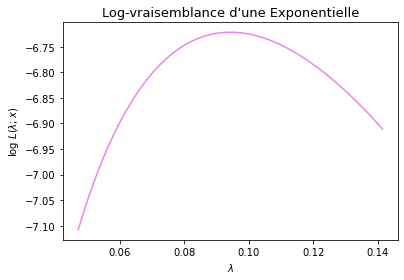

In [31]:
result_sum_expo = echantillon.iat[0] + echantillon.iat[1]

def loglikelihood_expo(lambda_expo):
    return n*np.log(lambda_expo) - lambda_expo * result_sum_expo

# Calculate estimate by the MLE:
lambda_exp = 1/echantillon.mean()

# Create vector for plot of loglikelihood
lambda_vector = np.linspace(0.5 * lambda_exp, 1.5 * lambda_exp, 100)

fig = plt.figure()
plt.plot(lambda_vector, loglikelihood_expo(lambda_vector), color = 'violet')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\log \ L(\lambda ; x)$')
plt.title('Log-vraisemblance d\'une Exponentielle', fontsize = 13)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

- distribution normale (deux axes des abscisses, un axe des ordonnées) :

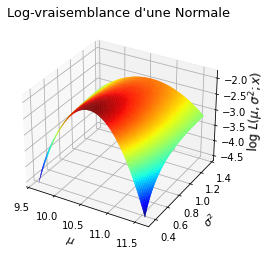

In [32]:
def loglikelihood_normale(mu, sigma):
    return -n*np.log(np.sqrt(sigma)) - n/2 * np.log(2 * np.pi) -1/(2*sigma) * ((echantillon.iat[0] - mu)**2 +  (echantillon.iat[1] - mu)**2)

# Calculate estimate by the MLE:
mu = (echantillon.iat[0] + echantillon.iat[1])/2

# Create vector for plot of loglikelihood and calculation of sigma
mu_vector = np.linspace(mu - 1 , mu + 1, 100)

def sigma_carre(mu):
    sigma = np.zeros(len(mu))
    for i in range(len(mu)):
        sum_1 = (echantillon.iat[0] - mu[i])**2 + (echantillon.iat[1] - mu[i])**2
        sum_2 = (sum_1)/2
        sigma[i] = sum_2
    return sigma

sigma_vector_carre = sigma_carre(mu_vector)
Mu_vector, Sigma_vector_carre = np.meshgrid(mu_vector, sigma_vector_carre)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface( Mu_vector, Sigma_vector_carre, loglikelihood_normale(Mu_vector, Sigma_vector_carre),  rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_title("Log-vraisemblance d\'une Normale", fontsize = 13)
ax.set_xlabel(r'$\mu$', fontsize = 11)
ax.set_ylabel(r'$\sigma^2$', fontsize = 11)
ax.set_zlabel(r'$\log \ L(\mu, \sigma^2 ; x)$', fontsize = 12)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Que pouvez-vous en déduire quant à la vraisemblance des modèles proposés pour l'échantillon tiré ?

<span style="color:red">

La vraisemblance est la probabilité d'avoir notre échantillon en fonction de nos paramètres $\lambda$ ou $\mu$ et $\sigma^2$.    

Exponentielle : Comme attendu, on observe un maximum de vraisemblance. On a donc un paramètre qui est le plus compatible avec le modèle choisi. Cependant, ce maximum étant très faible, on peut conclure que la distribution Exponentielle n'est pas celle qui fit le mieux nos données. Ceci infirme ce qu'on avait trouvé plus haut. 
    
Normale : Comme pour l'Exponentielle, on trouve de nouveau un maximum très faible bien qu'il soit un peu meilleur. L'hypothèse de la Normale n'est donc toujours pas correcte, mais correspond tout de même mieux qu'une Exponentielle.</span>

<!-- END QUESTION -->

